In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import cv2
import random,glob
import matplotlib.pyplot as plt 
from keras.models import Model,Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import Dense, Flatten , Conv2D, MaxPooling2D, Dropout,MaxPool2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import os 
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/README.txt
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R156_(18200,12804,1208).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R111_(33456,16748,357)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R77_(29440,11584,2334)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R17_(28032,11712,181).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R60_(22080,12992,1820)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R196_(33440,10748,2444)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/EGL/R18_(33888,15168,181)_rot60.png
/ka

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R35_(28100,22700,848)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R101_(21984,21584,2460)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R119_(33956,20448,2367)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R146_(28016,23348,2053)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R196_(32388,24992,613)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R86_(17424,22584,2510)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML/R73_(31784,19984,2464)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test/ML

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R70_(41940,9600,2020)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R9_(26720,16668,38)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R67_(28972,9792,2020)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R33_(32612,16000,803).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R132_(19676,14112,711)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R141_(26416,13052,886)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R107_(30732,12128,230)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/E

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R131_(24564,13104,711)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R51_(37020,11680,1317).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R149_(21880,9768,898)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R160_(32060,15760,1208)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R39_(23104,14628,1152)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R49_(30976,9776,1317).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R117_(24832,11856,428).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R71_

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R87_(39664,11636,2502).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R6_(11852,16720,0)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R117_(25132,11856,428)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R115_(32484,13664,428)_rot30.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R46_(18048,14912,1317).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R74_(33536,11360,2334)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R6_(11252,16720,0)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/EGL/R46_(

/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R164_(29264,23644,1354)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R157_(30944,24256,1539).png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R96_(36496,19852,2487)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R107_(42432,19856,2384)_rot45.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R4_(35448,22436,0)_rot90.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R1_(27120,24364,0)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R149_(40096,22100,2053)_rot60.png
/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train/ML/R99

### Training and test directory paths

In [2]:
train_data = '/kaggle/input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/train'
test_data = '../input/p7eglmltilesshiftrotate200regions/P7-EGL-ML-tiles-shift-rotate_200regions/test'
batch_size = 128
img_height = 300
img_width = 300

### Splits data into batches 

A batch is a small subset of the dataset a model looks at during training.

In [3]:
datagen = ImageDataGenerator(rescale = 1./ 255,
            validation_split = 0.2)

train_generator = datagen.flow_from_directory(
    train_data,
    shuffle=True,
    target_size = (300,300),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    train_data,
     shuffle=True,
    target_size = (300,300),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)


Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


### Get a sample of training data batch 


In [4]:
images, labels = train_generator.next()
len(images) , len(labels)

(128, 128)

### Lets look at first 2 images of the batch

In [5]:
images[:2], images[0].shape

(array([[[[0.7254902 , 0.7254902 , 0.7254902 ],
          [0.6901961 , 0.6901961 , 0.6901961 ],
          [0.6431373 , 0.6431373 , 0.6431373 ],
          ...,
          [0.5921569 , 0.5921569 , 0.5921569 ],
          [0.40784317, 0.40784317, 0.40784317],
          [0.6627451 , 0.6627451 , 0.6627451 ]],
 
         [[0.63529414, 0.63529414, 0.63529414],
          [0.64705884, 0.64705884, 0.64705884],
          [0.64705884, 0.64705884, 0.64705884],
          ...,
          [0.59607846, 0.59607846, 0.59607846],
          [0.5921569 , 0.5921569 , 0.5921569 ],
          [0.74509805, 0.74509805, 0.74509805]],
 
         [[0.6156863 , 0.6156863 , 0.6156863 ],
          [0.6666667 , 0.6666667 , 0.6666667 ],
          [0.63529414, 0.63529414, 0.63529414],
          ...,
          [0.62352943, 0.62352943, 0.62352943],
          [0.69411767, 0.69411767, 0.69411767],
          [0.78823537, 0.78823537, 0.78823537]],
 
         ...,
 
         [[0.7254902 , 0.7254902 , 0.7254902 ],
          [0.75294

In [ ]:
# View the first batch of labels 
labels

### Due to the class_mode parameter being 'binary' our labels are either 0 (EGL) or 1 (ML).

## Create a model(start with a baseline)

In [6]:
model_1 = Sequential([
    # input layer (specify the input shape)
    Conv2D(filters = 16, kernel_size = 3, padding = 'valid', activation = 'relu', input_shape = (300,300,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,3,activation = 'relu',padding = 'valid'),
    MaxPooling2D((2,2)),
    Conv2D(64,3,activation = 'relu',padding = 'valid'),
    MaxPooling2D((2,2)),
    Conv2D(128,3,activation = 'relu',padding = 'valid'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid') # Output layers specify the output shape 
])

### Compile the baseline model


In [7]:
model_1.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy']
)


### Fit a model 

In [8]:
len(train_generator),len(validation_generator)

(50, 13)

In [9]:

# Fit the model
history_1 = model_1.fit_generator(train_generator,
                        epochs=30,
                        steps_per_epoch=len(train_generator),
                        validation_data=validation_generator,
                        validation_steps=len(validation_generator)
                       )

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
50/50 [==============================] - 88s 2s/step - loss: 0.7529 - accuracy: 0.5711 - val_loss: 0.6301 - val_accuracy: 0.6662
Epoch 2/30
50/50 [==============================] - 41s 832ms/step - loss: 0.4582 - accuracy: 0.7966 - val_loss: 0.8260 - val_accuracy: 0.5838
Epoch 3/30
50/50 [==============================] - 41s 829ms/step - loss: 0.4043 - accuracy: 0.8303 - val_loss: 0.3778 - val_accuracy: 0.8194
Epoch 4/30
50/50 [==============================] - 41s 827ms/step - loss: 0.2646 - accuracy: 0.9004 - val_loss: 0.6780 - val_accuracy: 0.7400
Epoch 5/30
50/50 [==============================] - 41s 826ms/step - loss: 0.1915 - accuracy: 0.9282 - val_loss: 0.5802 - val_accuracy: 0.8188
Epoch 6/30
50/50 [==============================] - 41s 831ms/step - loss: 0.1547 - accuracy: 0.9465 - val_loss: 0.5458 - val_accuracy: 0.8200
Epoch 7/30
50/50 [==============================] - 41s 830ms/step - loss: 0.0804 - accuracy: 0.9744 - val_loss: 0.4099 - val_accuracy: 0.8675
Ep

In [10]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

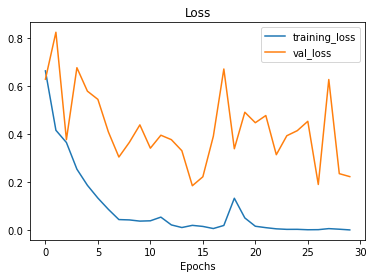

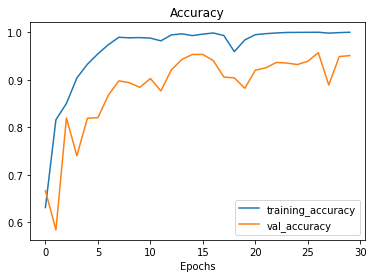

In [11]:
plot_loss_curves(history_1)

## Model Evalution

### Test Image Generator

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./ 255)
test_generator = test_datagen.flow_from_directory(
    test_data,
    shuffle = True,
    target_size = (300,300),
    batch_size= batch_size,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [13]:
train_loss, train_acc = model_1.evaluate_generator(train_generator,steps = 32)
test_loss, test_acc = model_1.evaluate_generator(test_generator,steps = 32)
print('Train: %.3f, Test: %.3f'%(train_acc,test_acc))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Train: 1.000, Test: 0.975


Train: 0.997, Test: 0.980

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
probabilities = model_1.predict_generator(generator=test_generator)
y_true = test_generator.classes
y_pred = probabilities > 0.9
mat = confusion_matrix(y_true, y_pred)
mat


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[533, 467],
       [520, 480]])

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import confusion_matrix,classification_report
Y_pred = model_1.predict_generator(validation_generator, 1600 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['EGL', 'ML']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))